<a href="https://colab.research.google.com/github/RahulSharma0224/EDA_Optimising_NYC_Taxis/blob/main/EDA_Assg_NYC_Taxi_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
!pip install numpy==1.26.4
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2

In [4]:
!pip install pandas pyarrow

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file
df = r'/content/2023-1.parquet'
# df = pd.read_parquet('2023-1.parquet')
# df.info()

In [7]:
df1 = pd.read_parquet(df, engine='auto')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [8]:
df1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [9]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

sampled_data = pd.DataFrame()
hour_data = pd.DataFrame()

sample = hour_data.sample(frac = 0.05, random_state = 42)
sampled_data = pd.concat([sampled_data, sample])

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Nyc_EDA_upGrad/taxi_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# Initialize an empty dataframe
df = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        current_df = pd.read_parquet(file_path, engine='auto')

        # Sample 5% of the data from each hour of each day
        sampled_data = pd.DataFrame()
        # Convert 'tpep_pickup_datetime' to datetime objects if not already
        current_df['tpep_pickup_datetime'] = pd.to_datetime(current_df['tpep_pickup_datetime'])

        # Group data by date and hour
        for date, group in current_df.groupby(current_df['tpep_pickup_datetime'].dt.date):
            for hour, hour_group in group.groupby(group['tpep_pickup_datetime'].dt.hour):
                sample = hour_group.sample(frac=0.05, random_state=42)
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Now 'df' contains the sampled data from all the files.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [12]:
# Store the df in csv/parquet
df.to_parquet('/content/drive/MyDrive/Nyc_EDA_upGrad/combined_taxi_data.', engine='pyarrow', compression='snappy')


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file
df2 = pd.read_parquet('/content/drive/MyDrive/Nyc_EDA_upGrad/combined_taxi_data.parquet', engine='auto')



In [14]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2,2023-08-31 23:56:01,2023-09-01 00:18:41,1.0,3.11,1.0,N,114,246,1,21.20,1.0,0.5,0.00,0.00,1.0,26.20,2.5,0.00,NaN
1,2,2023-09-01 00:39:59,2023-09-01 01:00:28,NaN,4.71,NaN,None,113,238,0,24.83,0.0,0.5,4.32,0.00,1.0,33.15,NaN,NaN,NaN
2,2,2023-09-01 00:24:50,2023-09-01 00:27:19,2.0,0.56,1.0,N,142,142,2,5.10,1.0,0.5,0.00,0.00,1.0,10.10,2.5,0.00,NaN
3,2,2023-09-01 00:19:27,2023-09-01 01:04:02,2.0,18.46,2.0,N,132,163,1,70.00,0.0,0.5,15.71,6.94,1.0,98.40,2.5,1.75,NaN
4,2,2023-09-01 00:42:13,2023-09-01 01:20:20,2.0,13.71,1.0,N,249,180,4,59.70,1.0,0.5,0.00,0.00,1.0,64.70,2.5,0.00,NaN


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed

# Reset the index of the DataFrame
df2 = df2.reset_index(drop=True)

# Drop unnecessary columns (example: if 'Unnamed: 0' exists)
if 'Unnamed: 0' in df2.columns:
    df2 = df2.drop('Unnamed: 0', axis=1)



**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Combine the two airport fee columns
if 'Airport_fee' in df2.columns and 'airport_fee' in df2.columns:
    # Combine the values, prioritizing 'Airport_fee' if both are present
    df2['Airport_fee'] = df2['Airport_fee'].fillna(df2['airport_fee'])

    # Drop the redundant column
    df2 = df2.drop('airport_fee', axis=1)

# If only one airport fee column exists, no action needed

# Display info to confirm changes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [18]:
# check where values of fare amount are negative
monetary_columns = ['fare_amount', 'mta_tax', 'improvement_surcharge', 'tip_amount',
                    'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee']

for col in monetary_columns:
    if col in df2.columns:
        df2.loc[df2[col] < 0, col] = 0  # Replace negative values with 0
    else:
        print(f"Column '{col}' not found in DataFrame.")


Did you notice something different in the `RatecodeID` column for above records?

In [19]:
zero_fare_ratecodes = df2[df2['fare_amount'] == 0]['RatecodeID'].value_counts()

zero_fare_ratecodes

,count
RatecodeID,
1.0,380
5.0,158
2.0,56
99.0,24
4.0,13
3.0,4


In [20]:
# Analyse RatecodeID for the negative fare amounts

negative_fare_analysis = df2[df2['fare_amount'] < 0].groupby('RatecodeID')['fare_amount'].agg(['count', 'min', 'max'])
print(negative_fare_analysis)

Empty DataFrame
Columns: [count, min, max]
Index: []


In [21]:
# Find which columns have negative values
negative_columns = []
for col in monetary_columns:
    if col in df2.columns and (df2[col] < 0).any():
        negative_columns.append(col)

# Print the columns with negative values
if negative_columns:
    print("Columns with negative values:", negative_columns)
else:
    print("No monetary columns have negative values.")


No monetary columns have negative values.


In [22]:
# fix these negative values
monetary_columns = ['fare_amount', 'mta_tax', 'improvement_surcharge', 'tip_amount',
                    'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee']

for col in monetary_columns:
    if col in df2.columns:
        df2.loc[df2[col] < 0, col] = 0  # Replace negative values with 0
    else:
        print(f"Column '{col}' not found in DataFrame.")

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [23]:
# Find the proportion of missing values in each column

df2.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,64874
trip_distance,0
RatecodeID,64874
store_and_fwd_flag,64874
PULocationID,0
DOLocationID,0
payment_type,0


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [24]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print(df2.groupby('passenger_count').size(),"\n")


# Calculating mode
mode_passenger_count = df2['passenger_count'].mode()


# Imputing missing values
df2['passenger_count'].fillna(mode_passenger_count[0], inplace=True)




passenger_count
0.0      29681
1.0    1377224
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15860
7.0          5
8.0         11
9.0          5
dtype: int64 



Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [25]:
# Fix missing values in 'RatecodeID'
print(df2.groupby('RatecodeID').size(),"\n")


# Calculating mode
mode_RatecodeID = df2['RatecodeID'].mode()


# Imputing missing values
df2['RatecodeID'].fillna(mode_RatecodeID[0], inplace=True)


RatecodeID
1.0     1729259
2.0       71670
3.0        6124
4.0        3723
5.0       10275
6.0           3
99.0      10472
dtype: int64 



**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [26]:
# handle null values in congestion_surcharge

print(df2.groupby('congestion_surcharge').size(),"\n")


# Calculating mode
mode_congestion_surcharge = df2['congestion_surcharge'].mode()


# Imputing missing values
df2['congestion_surcharge'].fillna(mode_congestion_surcharge[0], inplace=True)


congestion_surcharge
0.0     140953
0.5          1
2.5    1690572
dtype: int64 



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [27]:
# Handle any remaining missing values
print(df2.groupby('store_and_fwd_flag').size(),"\n")
print(df2.groupby('Airport_fee').size(),"\n")



# Calculating mode
mode_store_and_fwd_flag = df2['store_and_fwd_flag'].mode()
mode_Airport_fee = df2['Airport_fee'].mode()


# Imputing missing values
df2['store_and_fwd_flag'].fillna(mode_store_and_fwd_flag[0], inplace=True)
df2['Airport_fee'].fillna(mode_Airport_fee[0], inplace=True)

store_and_fwd_flag
N    1820287
Y      11239
dtype: int64 

Airport_fee
0.00    1670579
1.00          1
1.25      39823
1.75     121123
dtype: int64 



In [28]:
df2.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [30]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df2.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,1.896400e+06,1896400,1896400,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.733026e+00,2023-07-02 19:59:52.930793,2023-07-02 20:17:18.919563,1.356585e+00,3.858293e+00,1.612981e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588018e+00,4.952989e-01,3.547011e+00,5.965338e-01,9.990118e-01,2.898201e+01,2.314182e+00,1.380220e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00
std,4.476401e-01,NaN,NaN,8.799160e-01,1.294085e+02,7.267261e+00,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829200e+00,4.855675e-02,4.054882e+00,2.187878e+00,2.907216e-02,1.064162e+02,6.557557e-01,4.575627e-01


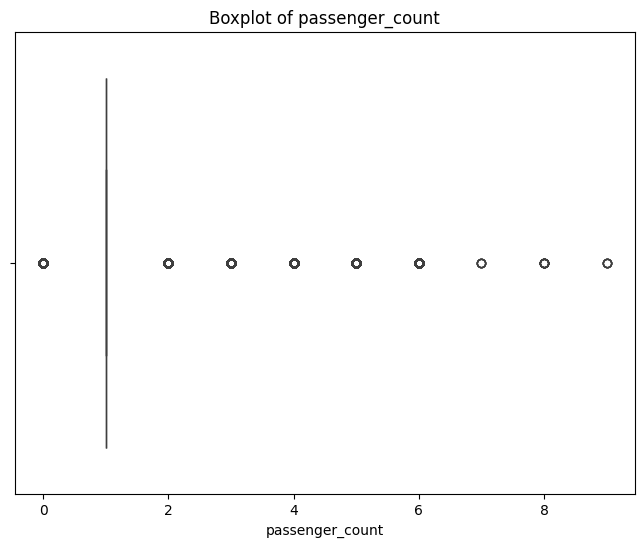

Potential outliers in passenger_count:
count    454302.000000
mean          2.488497
std           1.243836
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           9.000000
Name: passenger_count, dtype: float64

--------------------------------------------------


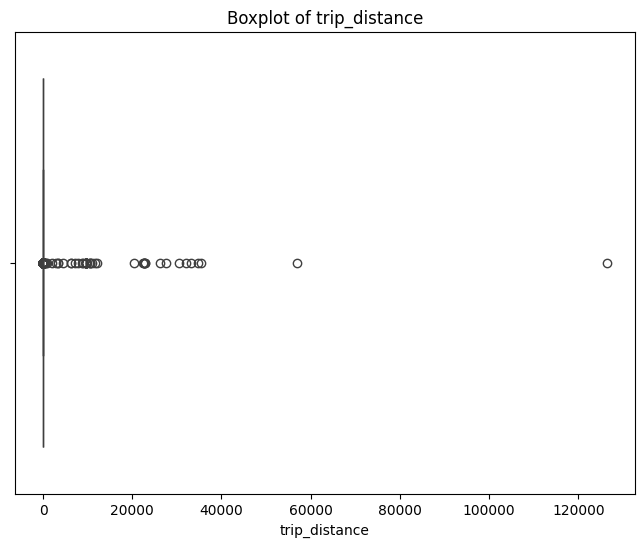

Potential outliers in trip_distance:
count    249302.000000
mean         16.597053
std         356.636548
min           6.930000
25%           9.200000
50%          11.730000
75%          17.600000
max      126360.460000
Name: trip_distance, dtype: float64

--------------------------------------------------


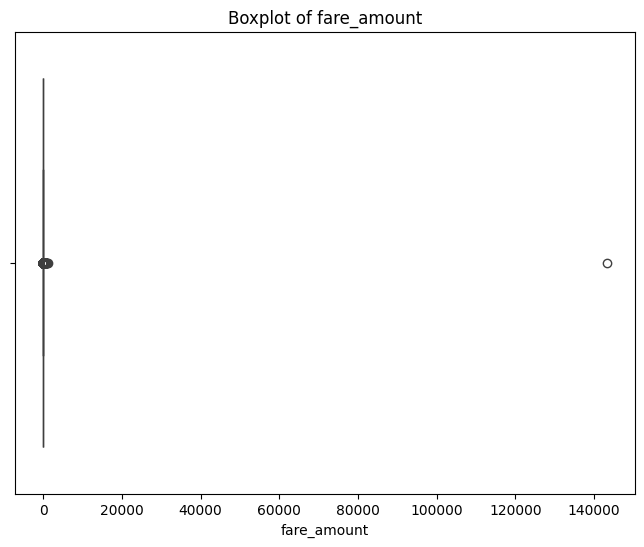

Potential outliers in fare_amount:
count    197413.000000
mean         64.542879
std         322.844424
min          40.810000
25%          48.500000
50%          68.800000
75%          70.000000
max      143163.450000
Name: fare_amount, dtype: float64

--------------------------------------------------


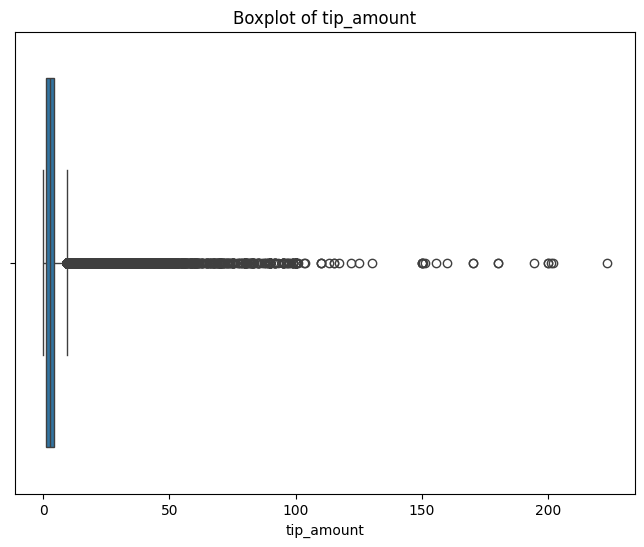

Potential outliers in tip_amount:
count    145673.000000
mean         14.479834
std           5.481452
min           9.560000
25%          11.070000
50%          13.640000
75%          16.190000
max         223.080000
Name: tip_amount, dtype: float64

--------------------------------------------------


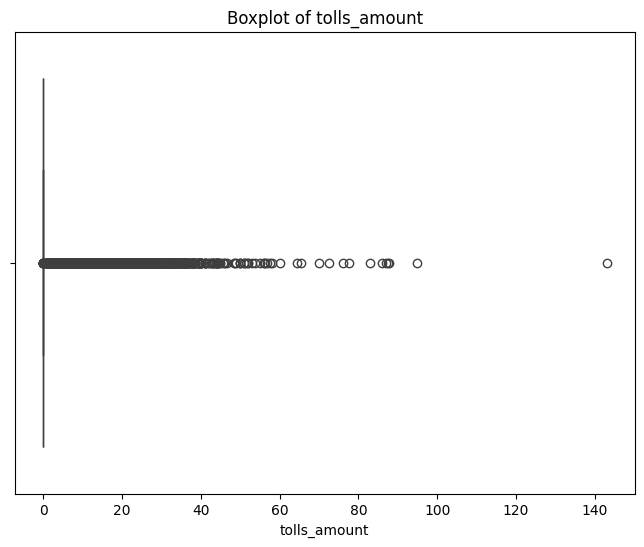

Potential outliers in tolls_amount:
count    153802.000000
mean          7.355345
std           3.051010
min           0.010000
25%           6.550000
50%           6.550000
75%           6.940000
max         143.000000
Name: tolls_amount, dtype: float64

--------------------------------------------------


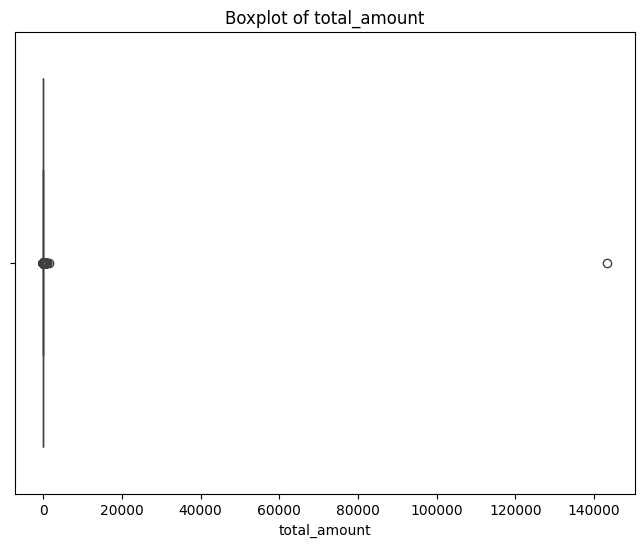

Potential outliers in total_amount:
count    218083.000000
mean         83.374520
std         307.430941
min          53.420000
25%          66.480000
50%          80.270000
75%          95.090000
max      143167.450000
Name: total_amount, dtype: float64

--------------------------------------------------


In [31]:
numerical_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Identify potential outliers using IQR method (example)
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]
    print(f"Potential outliers in {col}:\n{outliers[col].describe()}\n")
    print("-" * 50)

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [32]:
# remove passenger_count > 6
df2 = df2[df2['passenger_count'] <= 6]


In [33]:
# Continue with outlier handling
df2 = df2[df2['trip_distance'] <= 250]
df2 = df2[df2['fare_amount'] <= 300]
df2 = df2[df2['payment_type'] != 0]
df2 = df2[df2['RatecodeID'] != 99]





Analyzing column: passenger_count
count    1.820856e+06
mean     1.371268e+00
std      8.945735e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64


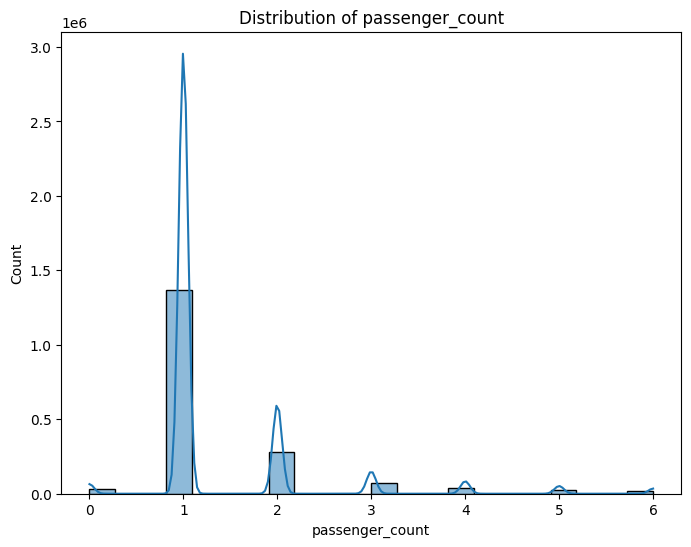

Analyzing column: trip_distance
count    1.820856e+06
mean     3.422551e+00
std      4.493452e+00
min      0.000000e+00
25%      1.050000e+00
50%      1.780000e+00
75%      3.340000e+00
max      1.873500e+02
Name: trip_distance, dtype: float64


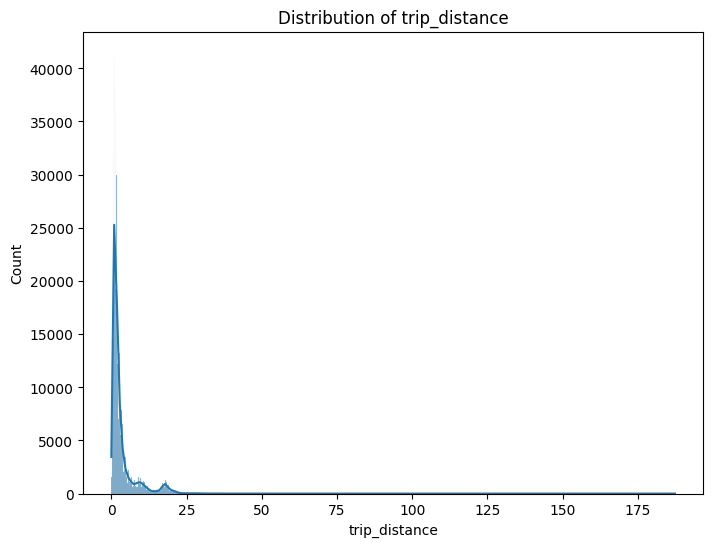

Analyzing column: fare_amount
count    1.820856e+06
mean     1.963559e+01
std      1.794920e+01
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      3.000000e+02
Name: fare_amount, dtype: float64


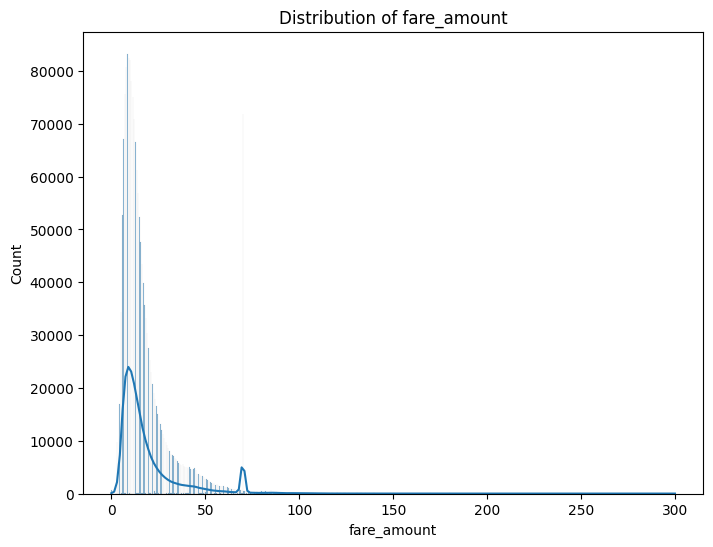

Analyzing column: tip_amount
count    1.820856e+06
mean     3.592814e+00
std      4.062828e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.860000e+00
75%      4.470000e+00
max      2.230800e+02
Name: tip_amount, dtype: float64


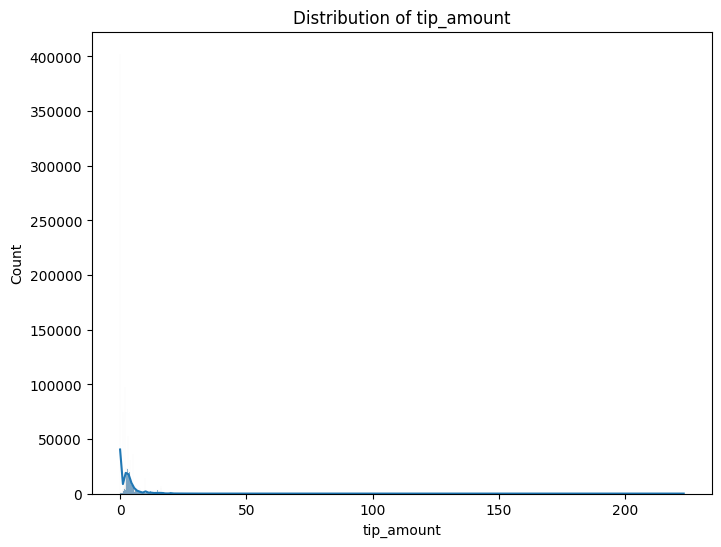

Analyzing column: tolls_amount
count    1.820856e+06
mean     5.890535e-01
std      2.169262e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.430000e+02
Name: tolls_amount, dtype: float64


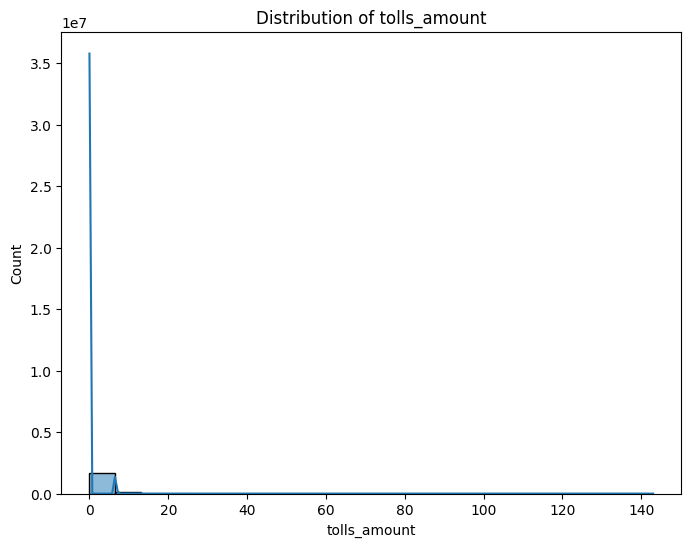

Analyzing column: total_amount
count    1.820856e+06
mean     2.879151e+01
std      2.263341e+01
min      0.000000e+00
25%      1.596000e+01
50%      2.100000e+01
75%      3.060000e+01
max      4.218800e+02
Name: total_amount, dtype: float64


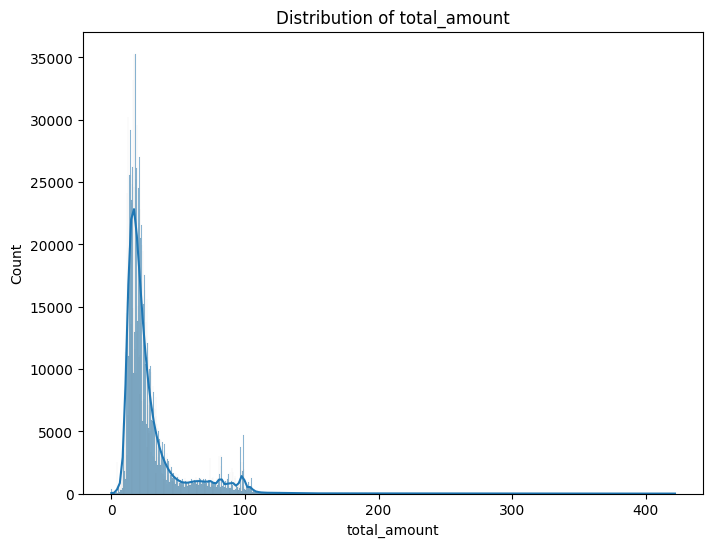

Analyzing column: congestion_surcharge
count    1.820856e+06
mean     2.321076e+00
std      6.444342e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.500000e+00
Name: congestion_surcharge, dtype: float64


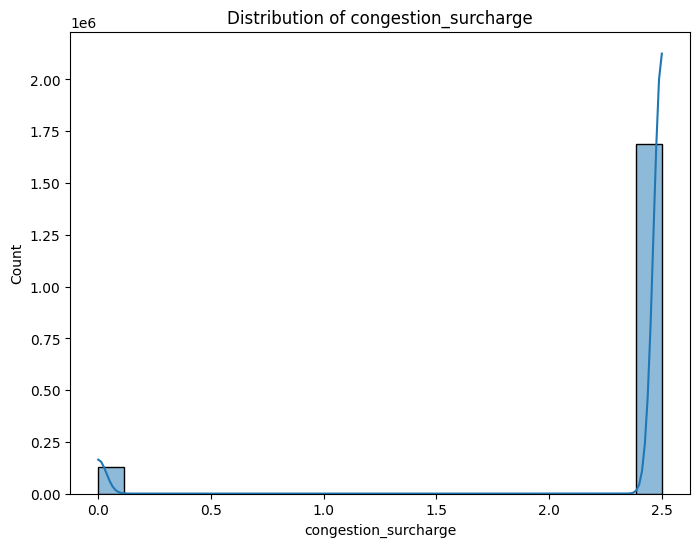

Analyzing column: Airport_fee
count    1.820856e+06
mean     1.436757e-01
std      4.659662e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.750000e+00
Name: Airport_fee, dtype: float64


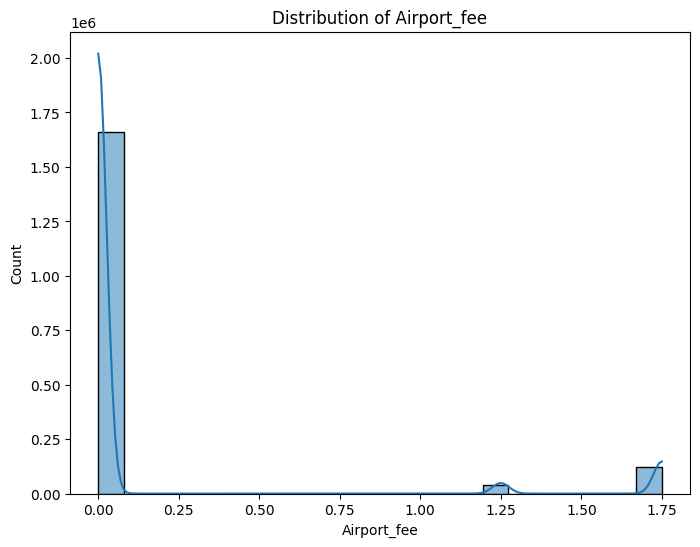

In [34]:
# Do any columns need standardising?
columns_to_check = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee']


# Check for skewed distributions and large ranges:
for col in columns_to_check:
  if col in df2.columns:
    print(f"Analyzing column: {col}")
    print(df2[col].describe())
    plt.figure(figsize=(8, 6))
    sns.histplot(df2[col], kde=True) # kde=True to show kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [35]:
df2.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

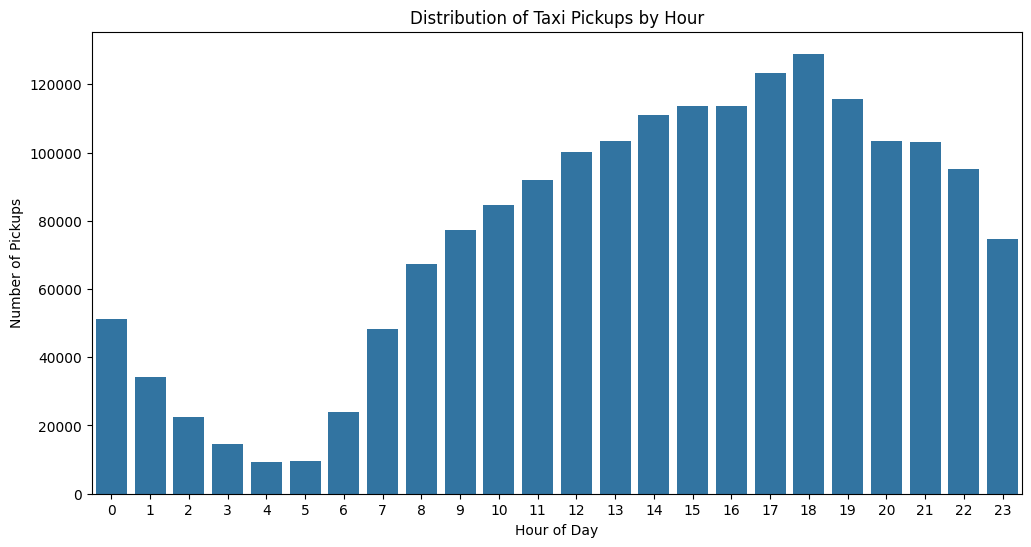

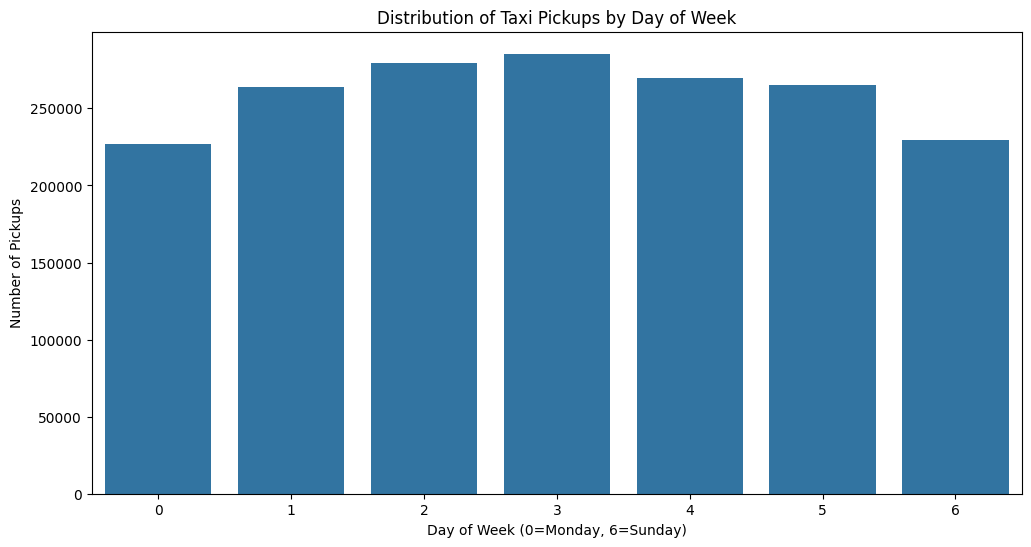

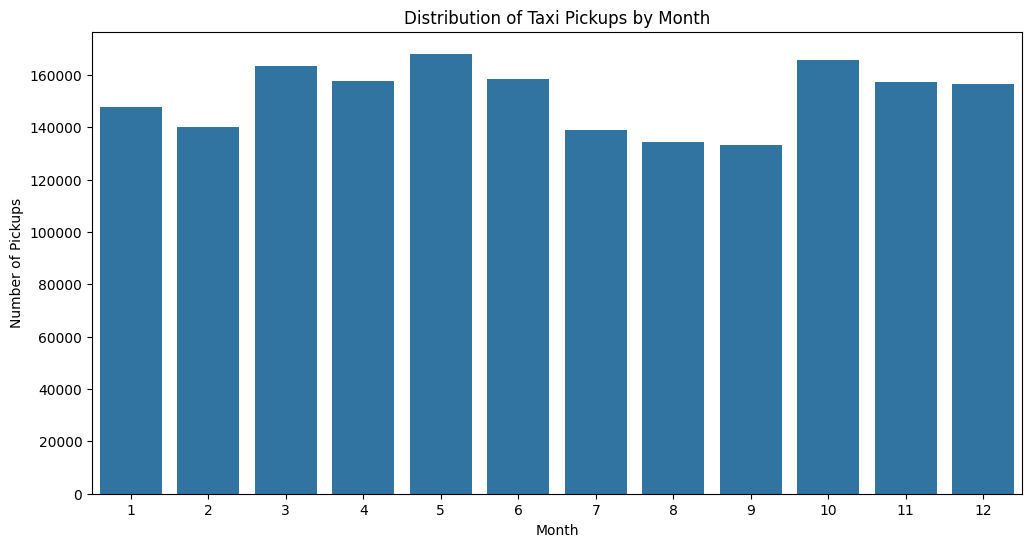

In [36]:
# Find and show the hourly trends in taxi pickups
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])

# Extract hour, day of week, and month
df2['pickup_hour'] = df2['tpep_pickup_datetime'].dt.hour
df2['day_of_week'] = df2['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df2['month'] = df2['tpep_pickup_datetime'].dt.month

# Hourly distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', data=df2)
plt.title('Distribution of Taxi Pickups by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()

# Daily distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df2)
plt.title('Distribution of Taxi Pickups by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.show()

# Monthly distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df2)
plt.title('Distribution of Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()



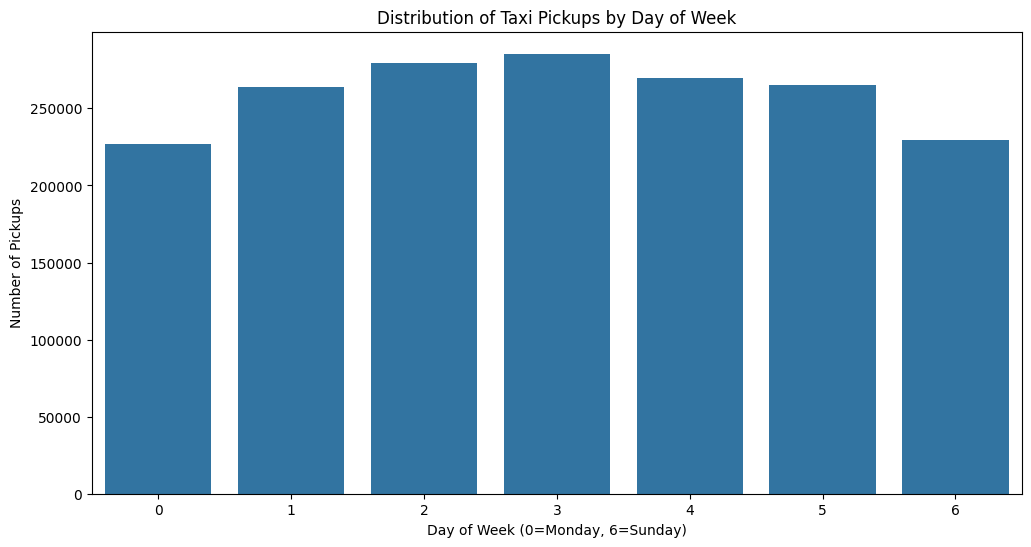

In [37]:
# Find and show the daily trends in taxi pickups (days of the week)

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df2)
plt.title('Distribution of Taxi Pickups by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.show()


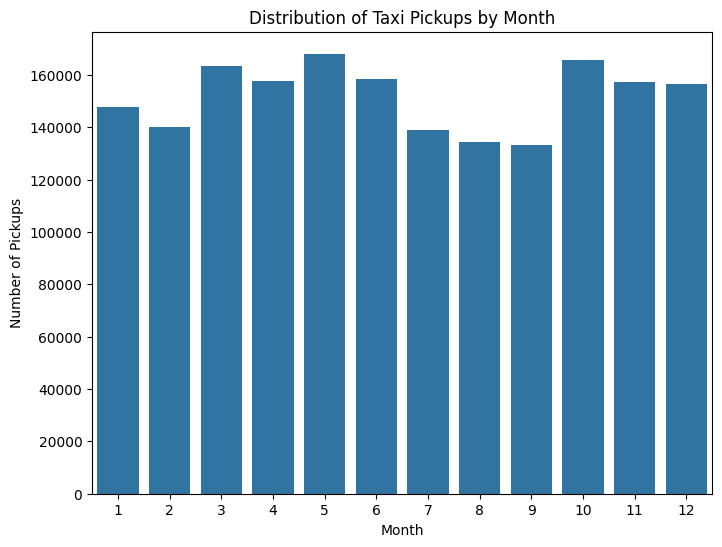

In [39]:
# Show the monthly trends in pickups

plt.figure(figsize=(8, 6))
sns.countplot(x='month', data=df2)
plt.title('Distribution of Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [40]:
# Analyse the above parameters
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in financial_columns:
    if col in df2.columns:
        zero_count = (df2[col] == 0).sum()
        negative_count = (df2[col] < 0).sum()
        print(f"Column '{col}':")
        print(f"  Zero values: {zero_count}")
        print(f"  Negative values: {negative_count}")
    else:
        print(f"Column '{col}' not found in DataFrame.")


Column 'fare_amount':
  Zero values: 611
  Negative values: 0
Column 'tip_amount':
  Zero values: 399765
  Negative values: 0
Column 'total_amount':
  Zero values: 357
  Negative values: 0
Column 'trip_distance':
  Zero values: 21833
  Negative values: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [41]:
# Create a df with non zero entries for the selected parameters.
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df2_filtered = df2[(df2[financial_columns] > 0).all(axis=1)]

# Display the filtered DataFrame (optional)
print(df2_filtered.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
5         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
6         2  2023-09-01 00:41:08   2023-09-01 00:54:33              5.0   
7         2  2023-09-01 00:07:47   2023-09-01 00:18:46              1.0   
8         2  2023-09-01 00:46:19   2023-09-01 01:00:11              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
3          18.46         2.0                  N           132           163   
5           0.71         1.0                  N           144           232   
6           4.39         1.0                  N            79           263   
7           1.76         1.0                  N            48           143   
8           6.32         1.0                  N           233            33   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
3             1

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

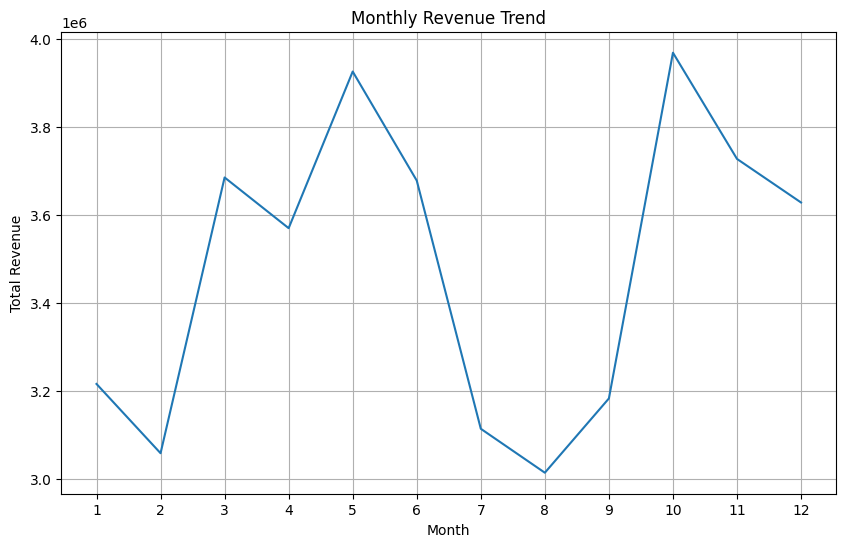

In [42]:
# Group data by month and analyse monthly revenue
monthly_revenue = df2_filtered.groupby('month')['total_amount'].sum()

# Create a line plot of the monthly revenue trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(monthly_revenue.index)  # Ensure all month labels are shown
plt.grid(True)
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

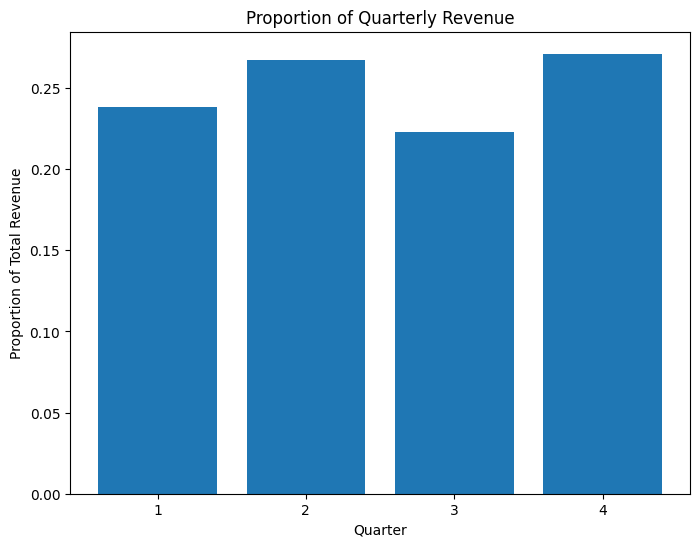

,total_amount
quarter,
1,0.238451
2,0.267509
3,0.222934
4,0.271107


In [43]:
# Calculate proportion of each quarter

# Calculate quarterly revenue
df2_filtered['quarter'] = df2_filtered['month'].apply(lambda x: (x - 1) // 3 + 1)
quarterly_revenue = df2_filtered.groupby('quarter')['total_amount'].sum()

# Calculate the proportion of each quarter
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum()

# Create a bar plot to visualize the proportions
plt.figure(figsize=(8, 6))
plt.bar(quarterly_proportion.index, quarterly_proportion.values)
plt.title('Proportion of Quarterly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Total Revenue')
plt.xticks(quarterly_proportion.index)
plt.show()

# Print the proportions
quarterly_proportion

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

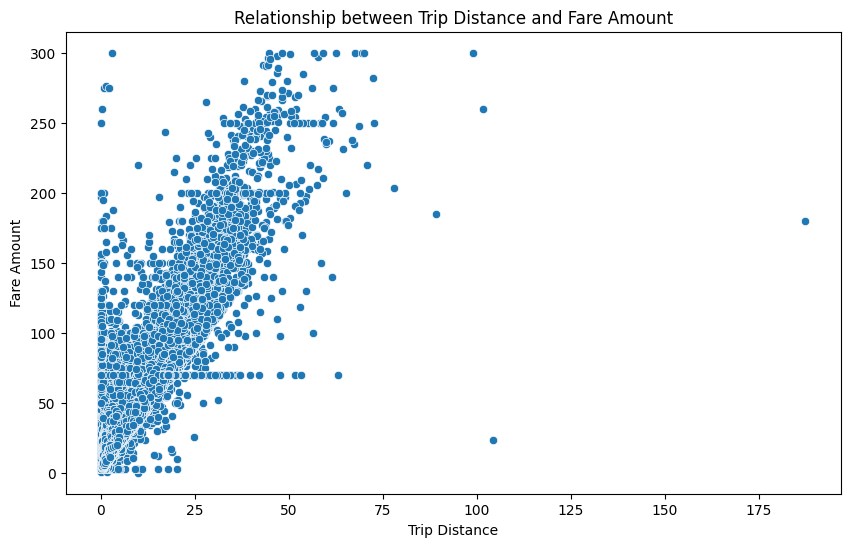

Correlation between trip_distance and fare_amount: 0.9506569128633457


In [44]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df2_filtered)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

# Calculate the correlation coefficient
correlation = df2_filtered['trip_distance'].corr(df2_filtered['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [45]:
# Show relationship between fare and trip duration

df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60




In [47]:
#plt.figure(figsize=(10, 6))
#sns.scatterplot(x='trip_duration', y='fare_amount', data=df2_filtered)
#plt.title('Fare Amount vs. Trip Duration')
#plt.xlabel('Trip Duration (minutes)')
#plt.ylabel('Fare Amount')
#plt.show()

#correlation_duration = df2_filtered['trip_duration'].corr(df2_filtered['fare_amount'])
#print(f"Correlation between fare_amount and trip_duration: {correlation_duration}")

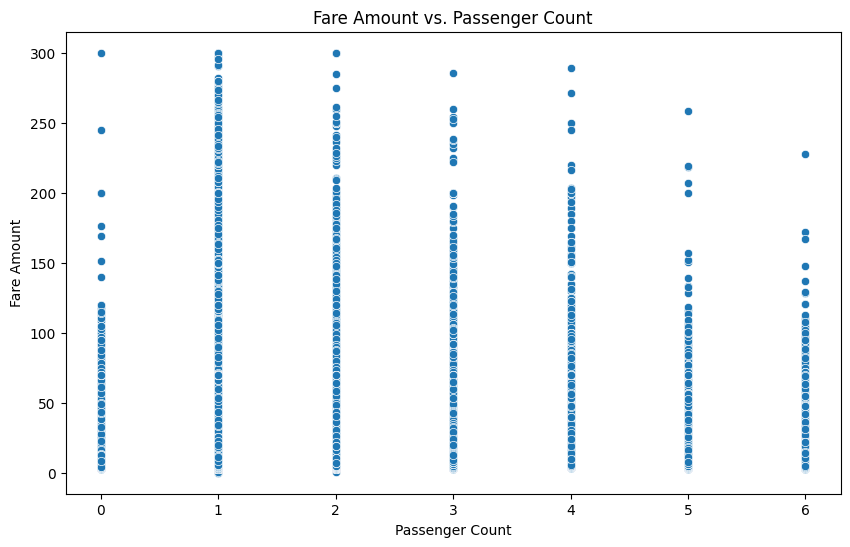

Correlation between fare_amount and passenger_count: 0.04063787170599423


In [48]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df2_filtered)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

correlation_passenger = df2_filtered['passenger_count'].corr(df2_filtered['fare_amount'])
print(f"Correlation between fare_amount and passenger_count: {correlation_passenger}")

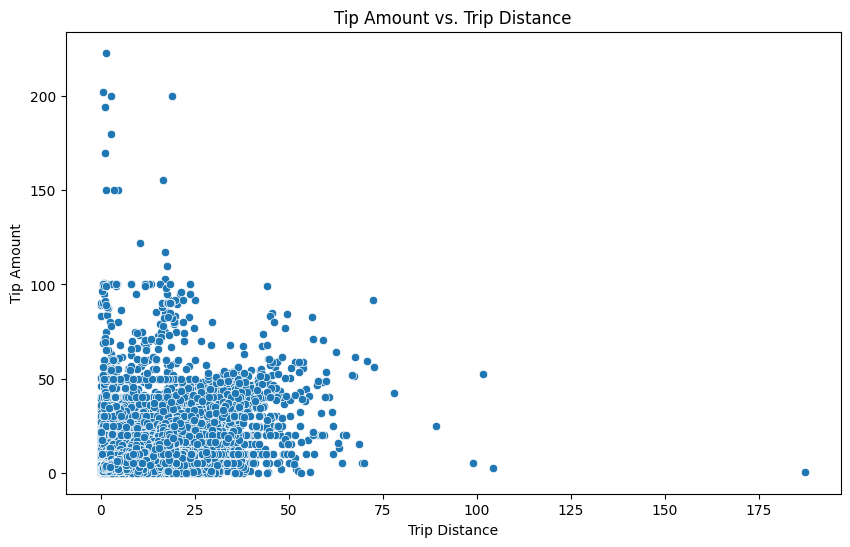

Correlation between tip_amount and trip_distance: 0.7994885679301452


In [49]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df2_filtered)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()

correlation_tip_distance = df2_filtered['trip_distance'].corr(df2_filtered['tip_amount'])
print(f"Correlation between tip_amount and trip_distance: {correlation_tip_distance}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

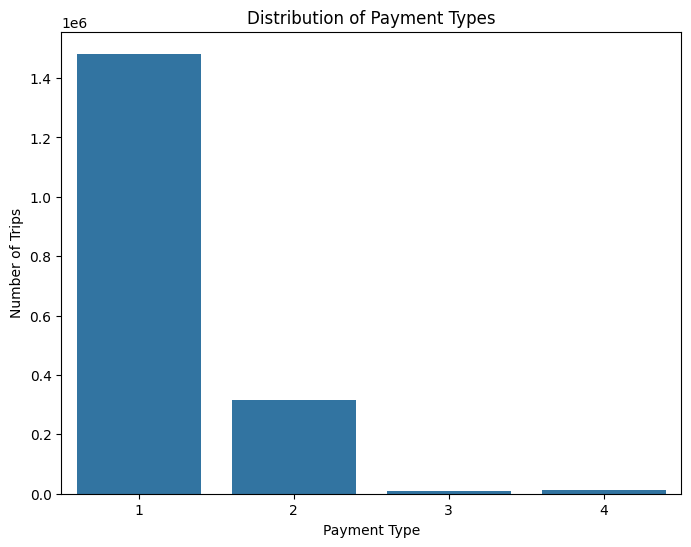

,proportion
payment_type,
1,0.813783
2,0.173762
4,0.007509
3,0.004946


In [50]:
# Analyse the distribution of different payment types (payment_type).

plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=df2)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.show()

payment_type_proportions = df2['payment_type'].value_counts(normalize=True)
payment_type_proportions


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [51]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [58]:
import geopandas as gpd




In [ ]:
# prompt: # Read the shapefile using geopandas
# zones = # read the .shp file using gpd
# zones.head()

import geopandas as gpd

zones = gpd.read_file('/content/Taxi Zones/taxi_zones.shp')
zones.head()


In [60]:
# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Nyc_EDA_upGrad/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

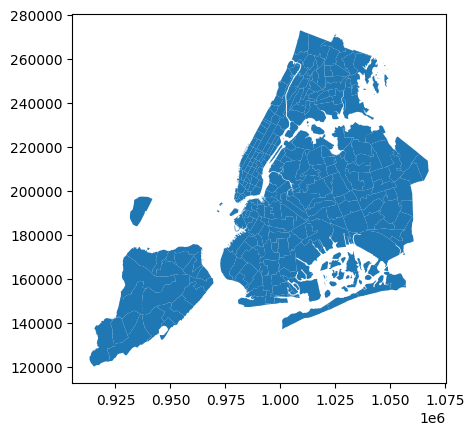

In [61]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [62]:
# Merge zones and trip records using locationID and PULocationID
df2 = pd.merge(df2, zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left', suffixes=('', '_pickup'))
df2.drop('LocationID', axis=1, inplace=True)  # Drop the duplicate LocationID column

# Merge zones data with trip data based on DOLocationID
df2 = pd.merge(df2, zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('', '_dropoff'))
df2.drop('LocationID', axis=1, inplace=True)  # Drop the duplicate LocationID column

# Display the first few rows of the merged DataFrame to verify
print(df2.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
3         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
4         2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.11         1.0                  N           114           246   
1           0.56         1.0                  N           142           142   
2          18.46         2.0                  N           132           163   
3          13.71         1.0                  N           249           180   
4           0.71         1.0                  N           144           232   

   payment_type  ...  congestion_surcharge  Airport_fee  pickup_hour  \
0 

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [63]:
# Group data by location and calculate the number of trips
trip_counts_by_location = df2.groupby('PULocationID')['VendorID'].count().reset_index()
trip_counts_by_location.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# Merge the trip counts back into the main DataFrame
df2 = pd.merge(df2, trip_counts_by_location, on='PULocationID', how='left')

trip_counts_by_location


,PULocationID,trip_count
0,1,214
1,2,2
2,3,6
3,4,1823
4,6,24
...,...,...
250,261,9601
251,262,23601
252,263,34841
253,264,17502


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [64]:
# Merge trip counts back to the zones GeoDataFrame

zones = pd.merge(zones, trip_counts_by_location, left_on='LocationID', right_on='PULocationID', how='left')
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,214.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,6.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1823.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,NaN


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

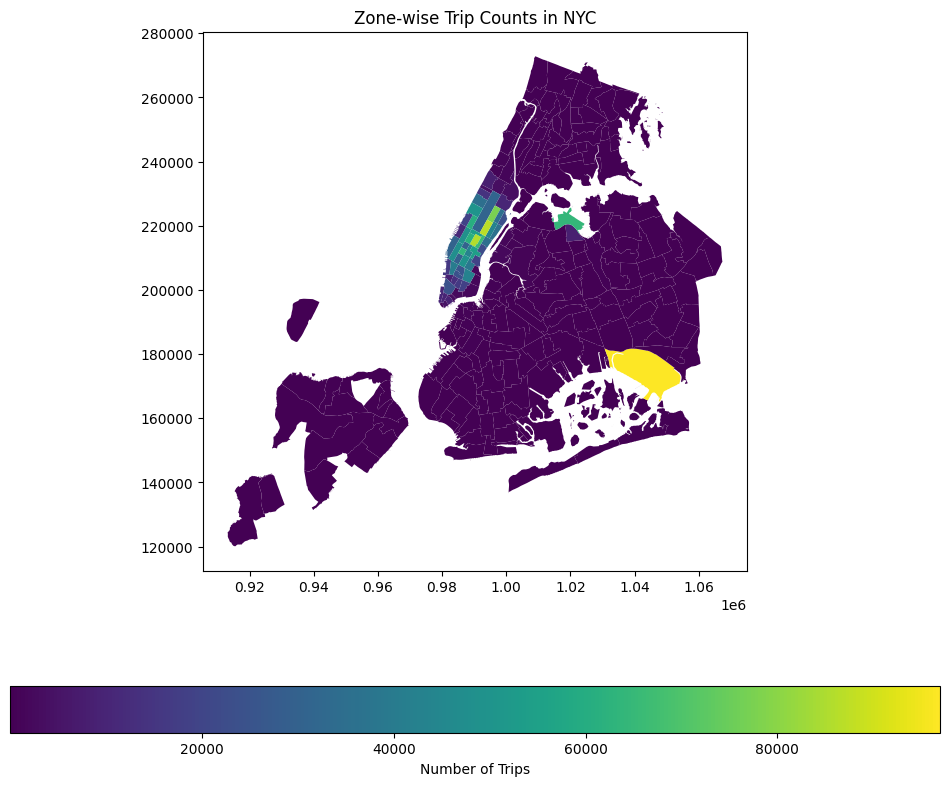

In [65]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column='trip_count', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.title('Zone-wise Trip Counts in NYC')
plt.show()




In [66]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by='trip_count', ascending=False)
zones_sorted

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,96946.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,86881.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,85922.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,77478.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,65611.0
...,...,...,...,...,...,...,...,...,...
103,104,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((973172.666 194632.348, 973310.63 194...",NaN,NaN
104,105,0.077425,0.000369,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((979605.759 191880.575, 979978.435 19...",NaN,NaN
109,110,0.103946,0.000526,Great Kills Park,110,Staten Island,"POLYGON ((951420.092 139894.411, 951856.209 13...",NaN,NaN
175,176,0.151995,0.000658,Oakwood,176,Staten Island,"POLYGON ((950393.94 148827.195, 950393.983 148...",NaN,NaN


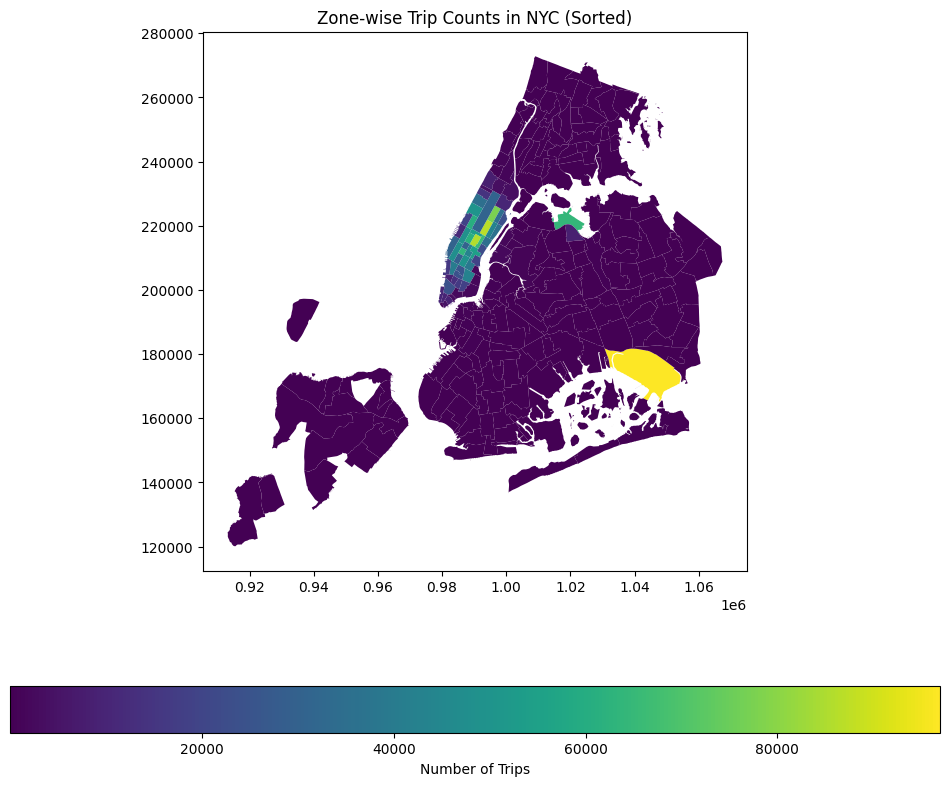

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_sorted.plot(column='trip_count', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})
plt.title('Zone-wise Trip Counts in NYC (Sorted)')
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [68]:
# Find routes which have the slowest speeds at different times of the day
df2['trip_speed'] = df2['trip_distance'] / (df2['trip_duration'] / 60)  # Speed in miles per hour

# Group by pickup and dropoff locations and hour, then calculate average speed
route_speeds = df2.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['trip_speed'].mean().reset_index()

# Find the slowest routes for each hour
slowest_routes = route_speeds.loc[route_speeds.groupby('pickup_hour')['trip_speed'].idxmin()]

slowest_routes


,PULocationID,DOLocationID,pickup_hour,trip_speed
3344,13,264,0,0.000000
38034,114,120,1,-49.195021
2077,13,13,2,0.000000
1272,10,10,3,0.000000
2,1,1,4,0.000000
27,1,264,5,0.000000
1221,7,244,6,0.000000
975,7,137,7,0.000000
6,1,1,8,0.000000
21,1,79,9,0.000000


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

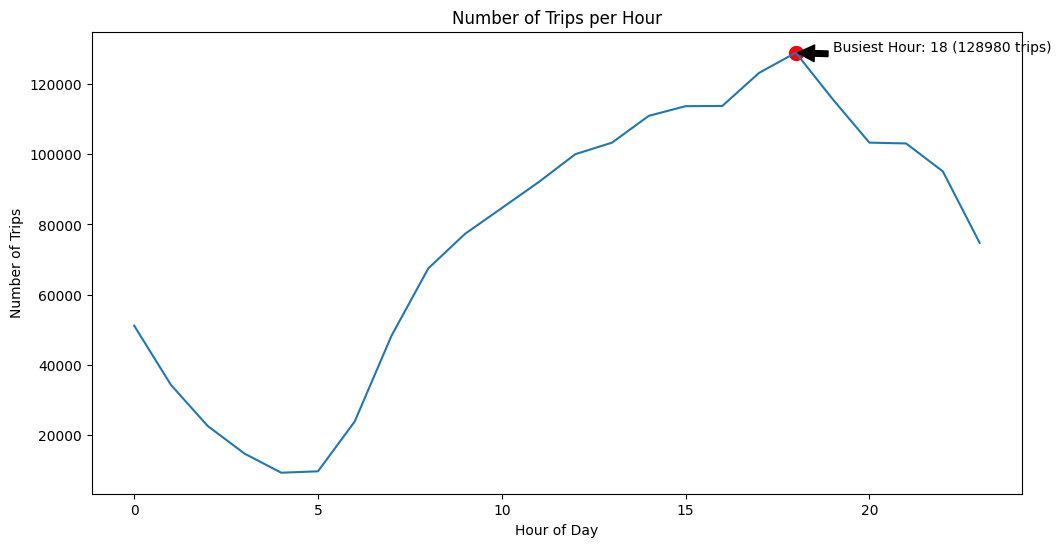

The busiest hour is 18 with 128980 trips.


In [69]:
# Visualise the number of trips per hour and find the busiest hour

trips_per_hour = df2.groupby('pickup_hour')['VendorID'].count()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_hour_trips = trips_per_hour.max()

# Visualize the number of trips per hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values)
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')

# Highlight the busiest hour
plt.scatter(busiest_hour, busiest_hour_trips, color='red', s=100)
plt.annotate(f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)',
             xy=(busiest_hour, busiest_hour_trips),
             xytext=(busiest_hour + 1, busiest_hour_trips + 500),  # Adjust text position as needed
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

print(f"The busiest hour is {busiest_hour} with {busiest_hour_trips} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [70]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

scaled_trips_per_hour = trips_per_hour / sample_fraction

# Find the five busiest hours
five_busiest_hours = scaled_trips_per_hour.nlargest(5)

print("Five Busiest Hours (scaled):")
five_busiest_hours


Five Busiest Hours (scaled):


,VendorID
pickup_hour,
18,1289800.0
17,1232340.0
19,1157690.0
16,1137990.0
15,1137350.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

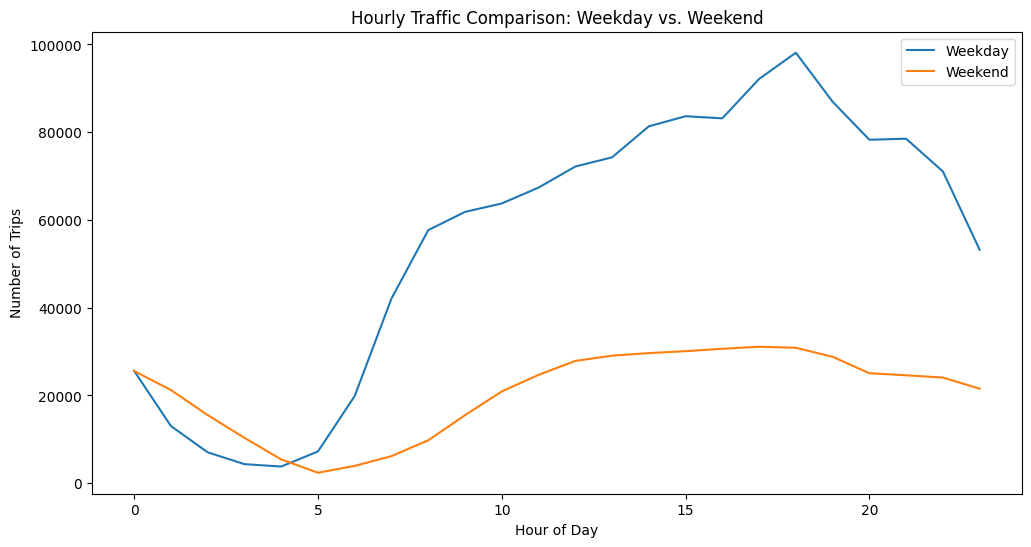

In [71]:
# Compare traffic trends for the week days and weekends
df2['day_type'] = df2['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by day type and hour, then count trips
hourly_traffic = df2.groupby(['day_type', 'pickup_hour'])['VendorID'].count().reset_index()

# Create separate dataframes for weekdays and weekends
weekday_traffic = hourly_traffic[hourly_traffic['day_type'] == 'Weekday']
weekend_traffic = hourly_traffic[hourly_traffic['day_type'] == 'Weekend']

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='VendorID', data=weekday_traffic, label='Weekday')
sns.lineplot(x='pickup_hour', y='VendorID', data=weekend_traffic, label='Weekend')
plt.title('Hourly Traffic Comparison: Weekday vs. Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

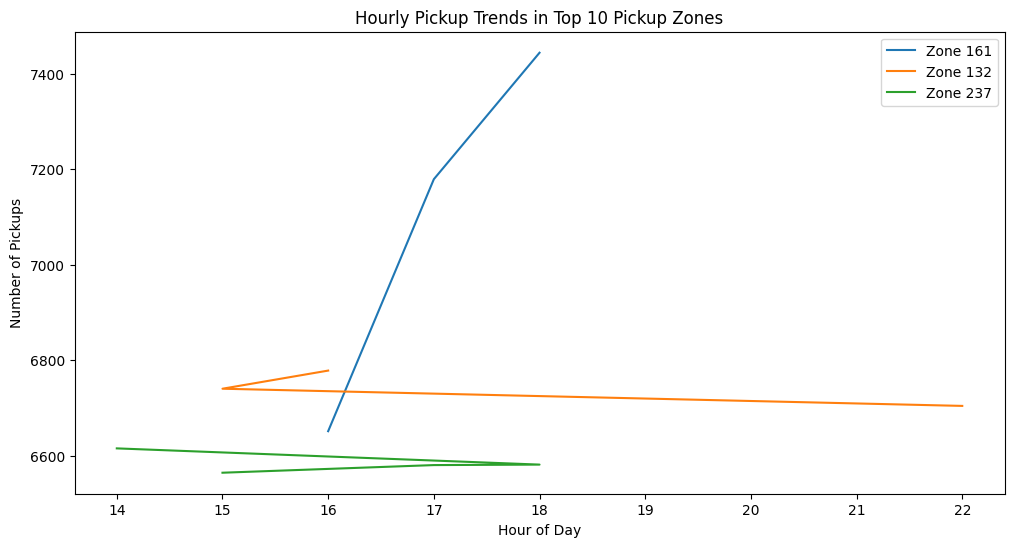

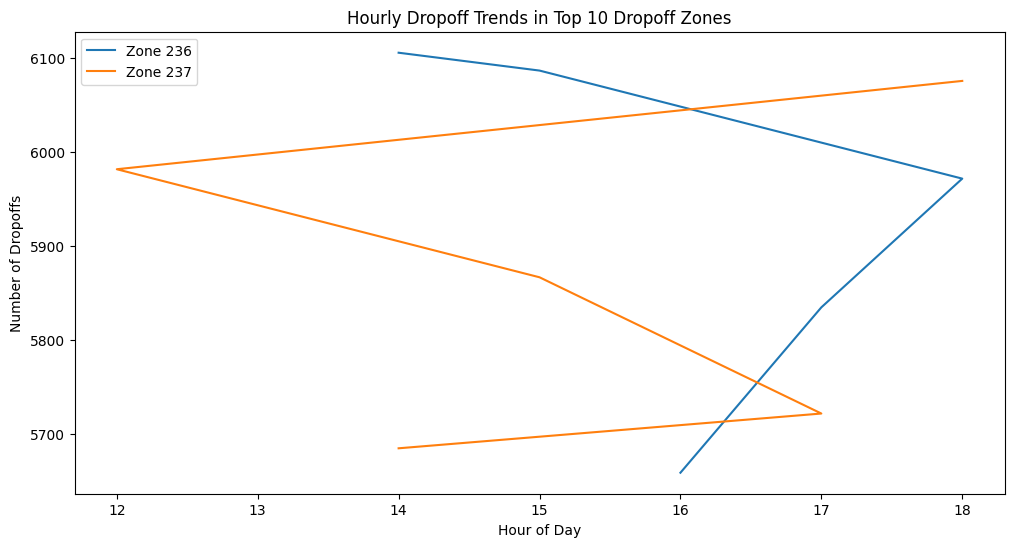

In [72]:
# Find top 10 pickup and dropoff zones
top_pickup_zones = df2.groupby(['PULocationID', 'pickup_hour'])['VendorID'].count().reset_index()
top_pickup_zones = top_pickup_zones.sort_values(by='VendorID', ascending=False).head(10)

# Identify top 10 zones with high hourly dropoffs
top_dropoff_zones = df2.groupby(['DOLocationID', 'pickup_hour'])['VendorID'].count().reset_index()
top_dropoff_zones = top_dropoff_zones.sort_values(by='VendorID', ascending=False).head(10)

# Show pickup trends in top zones
plt.figure(figsize=(12, 6))
for zone in top_pickup_zones['PULocationID'].unique():
    zone_data = top_pickup_zones[top_pickup_zones['PULocationID'] == zone]
    plt.plot(zone_data['pickup_hour'], zone_data['VendorID'], label=f'Zone {zone}')
plt.title('Hourly Pickup Trends in Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend()
plt.show()

# Show dropoff trends in top zones
plt.figure(figsize=(12, 6))
for zone in top_dropoff_zones['DOLocationID'].unique():
    zone_data = top_dropoff_zones[top_dropoff_zones['DOLocationID'] == zone]
    plt.plot(zone_data['pickup_hour'], zone_data['VendorID'], label=f'Zone {zone}')
plt.title('Hourly Dropoff Trends in Top 10 Dropoff Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [73]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df2.groupby('PULocationID')['VendorID'].count()
dropoff_counts = df2.groupby('DOLocationID')['VendorID'].count()

ratio_df = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts})
ratio_df['ratio'] = ratio_df['pickup_count'] / ratio_df['dropoff_count']

# Handle potential ZeroDivisionError
ratio_df['ratio'].fillna(0, inplace=True)
ratio_df = ratio_df.replace([np.inf, -np.inf], 0)

# Find the top 10 and bottom 10 ratios
top_10_ratios = ratio_df.sort_values('ratio', ascending=False).head(10)
bottom_10_ratios = ratio_df.sort_values('ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
bottom_10_ratios

Top 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count     ratio
70         8335.0          987.0  8.444782
132       96946.0        20962.0  4.624845
138       64272.0        22249.0  2.888759
186       63470.0        40068.0  1.584057
43        30751.0        22344.0  1.376253
114       24107.0        17530.0  1.375185
249       40398.0        30455.0  1.326482
162       65611.0        52214.0  1.256579
161       85922.0        71606.0  1.199927
100       30187.0        25318.0  1.192314

Bottom 10 Pickup/Dropoff Ratios:


,pickup_count,dropoff_count,ratio
30,NaN,15.0,0.000000
99,NaN,2.0,0.000000
84,NaN,9.0,0.000000
199,2.0,NaN,0.000000
5,NaN,9.0,0.000000
245,NaN,30.0,0.000000
176,NaN,12.0,0.000000
139,4.0,322.0,0.012422
227,5.0,275.0,0.018182
16,7.0,309.0,0.022654


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [74]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df2['pickup_hour'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.hour

# Filter for night hours (11 PM to 5 AM)
night_hours_df = df2[(df2['pickup_hour'] >= 23) | (df2['pickup_hour'] < 5)]

# Top 10 pickup zones during night hours
top_10_pickup_zones = night_hours_df.groupby('PULocationID')['VendorID'].count().reset_index()
top_10_pickup_zones = top_10_pickup_zones.sort_values(by='VendorID', ascending=False).head(10)

# Top 10 dropoff zones during night hours
top_10_dropoff_zones = night_hours_df.groupby('DOLocationID')['VendorID'].count().reset_index()
top_10_dropoff_zones = top_10_dropoff_zones.sort_values(by='VendorID', ascending=False).head(10)

print("Top 10 Pickup Zones during Night Hours:")
print(top_10_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours:")
top_10_dropoff_zones

Top 10 Pickup Zones during Night Hours:
     PULocationID  VendorID
65             79     15338
104           132     13388
208           249     12350
38             48      9795
120           148      9535
89            114      8720
190           230      7772
151           186      6233
134           164      5962
110           138      5945

Top 10 Dropoff Zones during Night Hours:


,DOLocationID,VendorID
77,79,8236
46,48,6641
163,170,6083
101,107,5626
66,68,5540
134,141,5120
240,249,4895
254,263,4877
141,148,4321
221,230,4295


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [75]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = df2[(df2['pickup_hour'] >= 23) | (df2['pickup_hour'] < 5)]

# Calculate revenue for night hours
night_revenue = night_hours_df['fare_amount'].sum()

# Calculate total revenue
total_revenue = df2['fare_amount'].sum()

# Calculate revenue share for night hours
night_revenue_share = (night_revenue / total_revenue) * 100

print(f"Nighttime revenue share: {night_revenue_share:.2f}%")


Nighttime revenue share: 11.50%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

passenger_count
0.0    inf
1.0    inf
2.0    inf
3.0    inf
4.0    inf
5.0    inf
6.0    inf
Name: fare_per_mile_per_passenger, dtype: float64


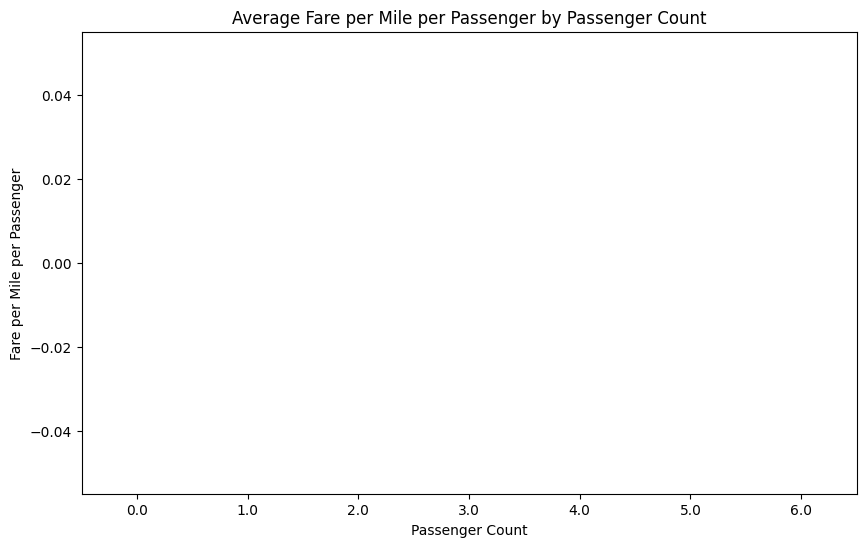

In [76]:
# Analyse the fare per mile per passenger for different passenger counts


df2['fare_per_mile_per_passenger'] = df2['fare_amount'] / (df2['trip_distance'] * df2['passenger_count'])

# Group by passenger count and calculate the average fare per mile per passenger
fare_per_mile_per_passenger_by_count = df2.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

print(fare_per_mile_per_passenger_by_count)

# Visualization (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x=fare_per_mile_per_passenger_by_count.index, y=fare_per_mile_per_passenger_by_count.values)
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

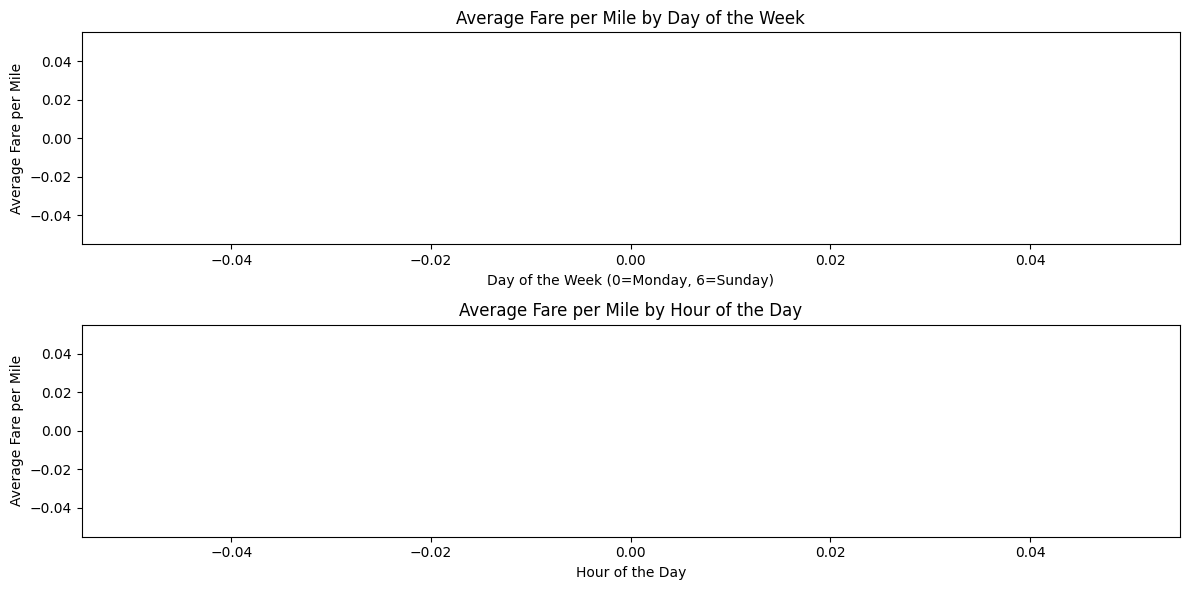

In [77]:
# Compare the average fare per mile for different days and for different times of the day
df2['fare_per_mile'] = df2['fare_amount'] / df2['trip_distance']

# Group by day of the week and calculate average fare per mile
fare_per_mile_by_day = df2.groupby('day_of_week')['fare_per_mile'].mean()

# Group by hour of the day and calculate average fare per mile
fare_per_mile_by_hour = df2.groupby('pickup_hour')['fare_per_mile'].mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.lineplot(x=fare_per_mile_by_day.index, y=fare_per_mile_by_day.values)
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Fare per Mile')

plt.subplot(2, 1, 2)
sns.lineplot(x=fare_per_mile_by_hour.index, y=fare_per_mile_by_hour.values)
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')

plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

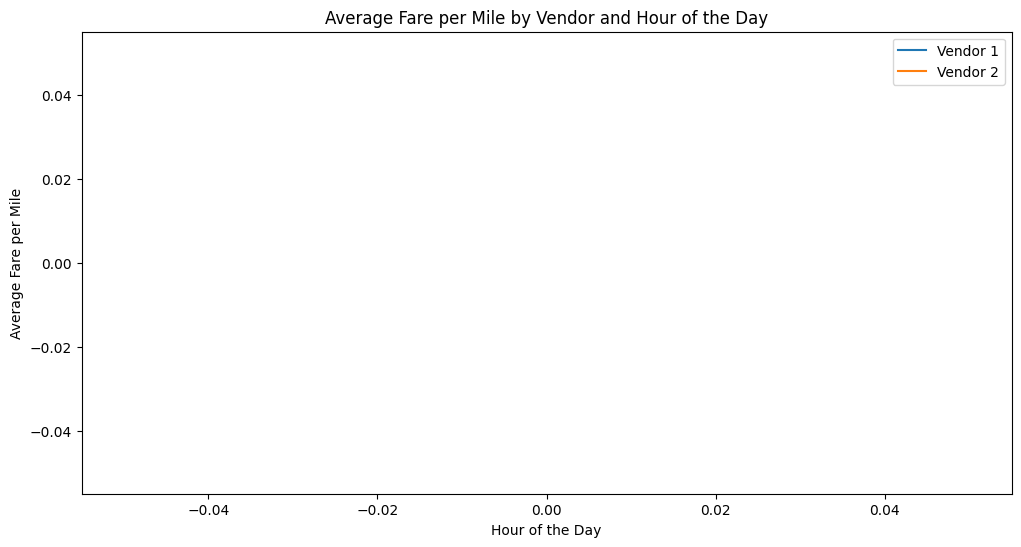

In [78]:
# Compare fare per mile for different vendors
df2['fare_per_mile'] = df2['fare_amount'] / df2['trip_distance']

# Group by vendor and hour, then calculate the average fare per mile
fare_per_mile_by_vendor_hour = df2.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
for vendor in fare_per_mile_by_vendor_hour['VendorID'].unique():
    vendor_data = fare_per_mile_by_vendor_hour[fare_per_mile_by_vendor_hour['VendorID'] == vendor]
    plt.plot(vendor_data['pickup_hour'], vendor_data['fare_per_mile'], label=f'Vendor {vendor}')

plt.title('Average Fare per Mile by Vendor and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.legend()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


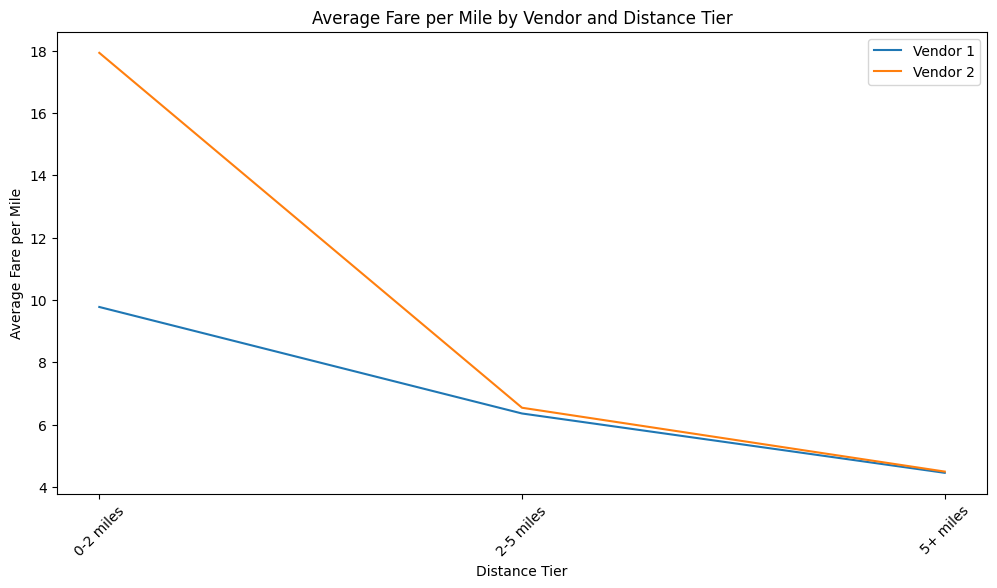

In [79]:
# Defining distance tiers
df2['distance_tier'] = pd.cut(df2['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['0-2 miles', '2-5 miles', '5+ miles'])

# Group by vendor, distance tier, and calculate the average fare per mile
fare_per_mile_by_vendor_distance = df2.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
for vendor in fare_per_mile_by_vendor_distance['VendorID'].unique():
    vendor_data = fare_per_mile_by_vendor_distance[fare_per_mile_by_vendor_distance['VendorID'] == vendor]
    plt.plot(vendor_data['distance_tier'], vendor_data['fare_per_mile'], label=f'Vendor {vendor}')

plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

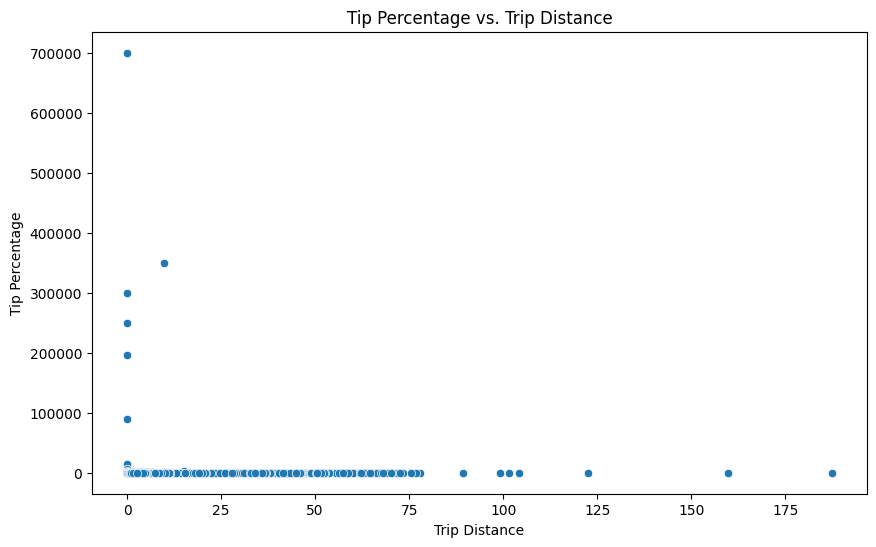

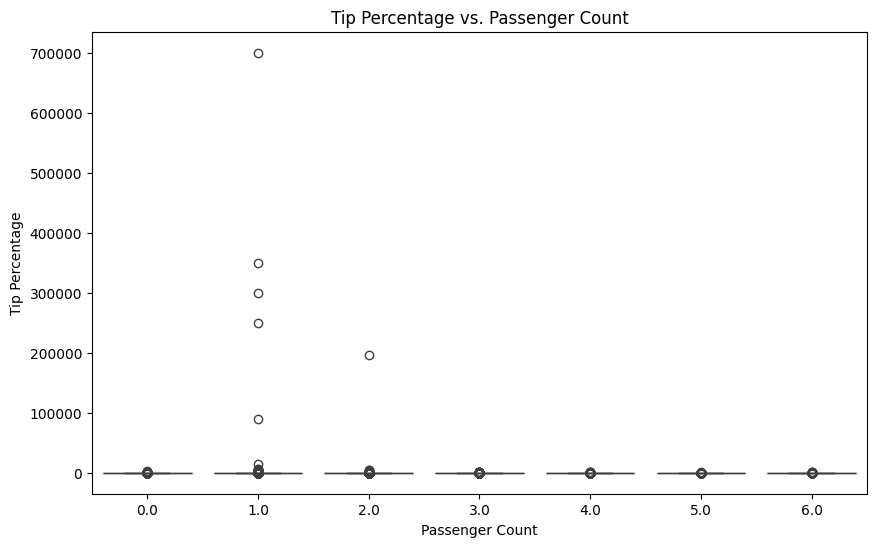

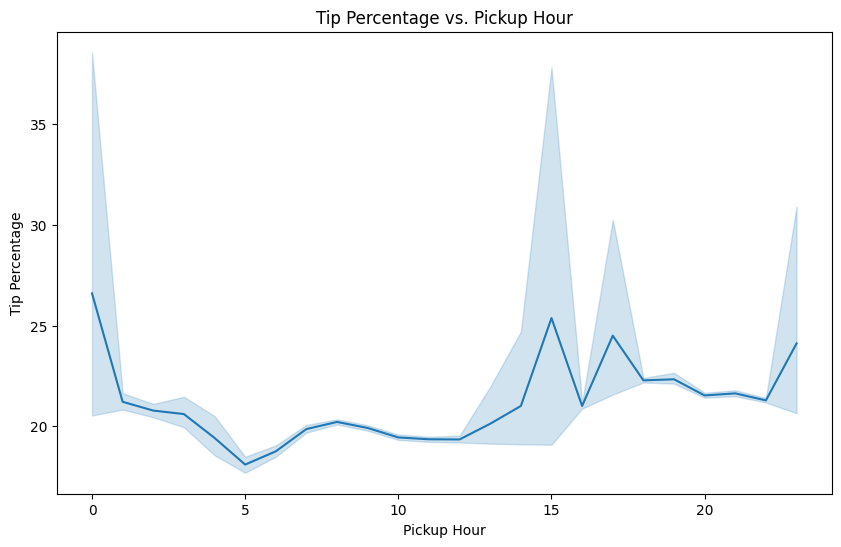

In [80]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df2['tip_percentage'] = (df2['tip_amount'] / df2['fare_amount']) * 100

# Handle potential infinite values resulting from zero fare amounts
df2['tip_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)
df2['tip_percentage'].fillna(0, inplace=True)

# Analyze tip percentage based on trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_percentage', data=df2)
plt.title('Tip Percentage vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.show()

# Analyze tip percentage based on passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='tip_percentage', data=df2)
plt.title('Tip Percentage vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.show()

# Analyze tip percentage based on pickup time (hour of the day)
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='tip_percentage', data=df2)
plt.title('Tip Percentage vs. Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [82]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_avg = df2[df2['tip_percentage'] < 10]['tip_percentage'].mean()

# Calculate the average tip percentage for trips with tip percentage > 25%
high_tip_avg = df2[df2['tip_percentage'] > 25]['tip_percentage'].mean()

print(f"Average tip percentage for trips with tip percentage < 10%: {low_tip_avg:.2f}%")
print(f"Average tip percentage for trips with tip percentage > 25%: {high_tip_avg:.2f}%")


Average tip percentage for trips with tip percentage < 10%: 1.08%
Average tip percentage for trips with tip percentage > 25%: 34.86%


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [84]:
# See how passenger count varies across hours and days

passenger_count_variation = df2.groupby(['pickup_hour', 'day_of_week'])['passenger_count'].mean().reset_index()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

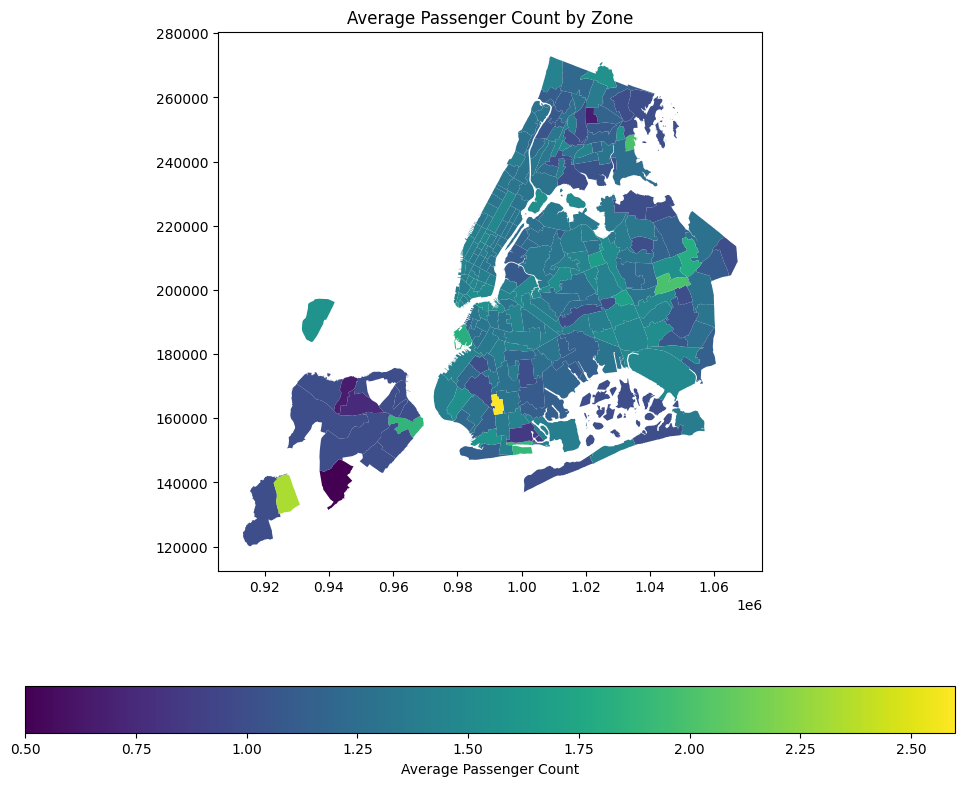

In [85]:
# How does passenger count vary across zones

passenger_count_by_zone = df2.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge with zones GeoDataFrame
zones_passenger_count = zones.merge(passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_passenger_count.plot(column='passenger_count', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Average Passenger Count", 'orientation': "horizontal"})
plt.title('Average Passenger Count by Zone')
plt.show()

In [86]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips = zones.merge(df2.groupby('PULocationID')['passenger_count'].mean().reset_index(),
                               left_on='LocationID', right_on='PULocationID', how='left')

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Top Pickup Zones with Extra Charges:
     PULocationID      extra
129           138  403422.29
123           132  146835.15
152           161  141357.50
227           237  126313.48
226           236  109417.40
153           162  104648.30
220           230   99554.75
133           142   90177.70
176           186   87536.67
154           163   85876.50

Top Dropoff Zones with Extra Charges:
     DOLocationID      extra
133           138  128718.70
230           236  122109.05
231           237  112348.75
156           161  103174.63
224           230  102492.75
165           170   85075.37
233           239   82918.70
137           142   81691.90
157           162   78366.80
136           141   78003.70

Top Pickup Hours with Extra Charges:
    pickup_hour      extra
18           18  350177.15
17           17  337853.24
19           19  309153.40
16           16  308060.75
20           20  187643.53
21           21  179097.65
22           22  162994.62
23           23  134518.35
15   

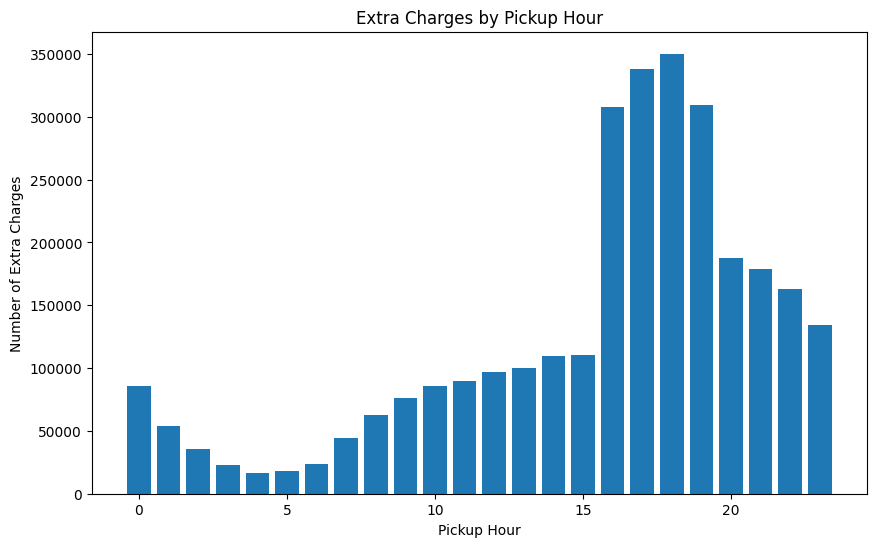

In [87]:
# How often is each surcharge applied?

extra_charges_by_pickup_zone = df2.groupby('PULocationID')['extra'].sum().reset_index()
extra_charges_by_pickup_zone = extra_charges_by_pickup_zone.sort_values(by='extra', ascending=False)


# Group by dropoff zone and count the occurrences of extra charges
extra_charges_by_dropoff_zone = df2.groupby('DOLocationID')['extra'].sum().reset_index()
extra_charges_by_dropoff_zone = extra_charges_by_dropoff_zone.sort_values(by='extra', ascending=False)


# Group by pickup hour and count the occurrences of extra charges
extra_charges_by_pickup_hour = df2.groupby('pickup_hour')['extra'].sum().reset_index()
extra_charges_by_pickup_hour = extra_charges_by_pickup_hour.sort_values(by='extra', ascending=False)


# Print or visualize the results
print("Top Pickup Zones with Extra Charges:")
print(extra_charges_by_pickup_zone.head(10)) # Display top 10

print("\nTop Dropoff Zones with Extra Charges:")
print(extra_charges_by_dropoff_zone.head(10)) # Display top 10

print("\nTop Pickup Hours with Extra Charges:")
print(extra_charges_by_pickup_hour)

# Visualization (Optional)
plt.figure(figsize=(10, 6))
plt.bar(extra_charges_by_pickup_hour['pickup_hour'], extra_charges_by_pickup_hour['extra'])
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Extra Charges")
plt.title("Extra Charges by Pickup Hour")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [88]:
# Based on the analysis of demand patterns and operational inefficiencies, here are some recommendations:

# 1. Dynamic Pricing: Implement dynamic pricing strategies based on time of day, day of the week, and location.
#    - Higher prices during peak hours (e.g., weekday evenings, late nights in specific zones) and lower prices during off-peak hours.
#    - Surge pricing in high-demand areas or during special events.
#    - Consider a tiered pricing structure based on trip distance.

# 2. Optimized Dispatching:
#    - Utilize real-time data on demand patterns and driver availability to optimize vehicle dispatch.
#    - Prioritize requests in high-demand areas, especially during peak hours.
#    - Implement predictive models to anticipate demand surges and proactively reposition drivers.
#    - Consider a zone-based dispatch strategy to ensure equitable distribution of drivers across areas.

# 3. Driver Incentives:
#    - Offer incentives to drivers to work during peak hours or in areas with high demand.
#    - Introduce bonuses or priority access to high-paying trips.

# 4. Routing Optimization:
#    - Employ efficient routing algorithms to minimize travel time and fuel consumption.
#    - Consider traffic conditions and real-time updates when generating routes.

# 5. Customer Communication:
#    - Communicate wait times and estimated arrival times to customers proactively.
#    - Provide real-time updates on the driver's location.
#    - Offer promotions or discounts during off-peak hours or for longer trips.

# 6. Operational Efficiency:
#    - Analyze data on operational inefficiencies (e.g., idle time, empty trips, high cancellation rates).
#    - Implement measures to reduce these inefficiencies, such as improved driver management or optimized routes.

# 7. Specific Recommendations based on findings:

#    - **High-Demand Zones:** Focus on driver availability and routing optimization in the top 10 pickup/dropoff zones, especially during peak hours and weekends.
#    - **Night Hours:** Ensure sufficient driver availability in zones with high night-time demand (11 PM to 5 AM). Special incentives may encourage drivers.
#    - **Low Tip Zones/Times:** Investigate potential reasons for low tips and consider implementing strategies to improve customer satisfaction and tipping behavior.
#    - **Demand Imbalances:** Address imbalances between pickup and dropoff zones by incentivizing drivers to move between locations.
#    - **Vendor Performance:** Analyze the average fare/mile differences between vendors and consider implementing strategies to promote efficiency.
#    - **Passenger Count Variations:** Adjust driver assignments to handle variations in passenger counts throughout the day and week.


# Conclusion:

# By integrating real-time data, dynamic pricing strategies, optimized dispatching, and driver incentives, the ride-hailing service can better match supply with demand, reduce wait times, improve customer satisfaction, and increase operational efficiency.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [90]:
# Based on the provided analysis, here's a strategy for strategically positioning cabs:

# 1. Time-Based Deployment:
#    - During peak hours (weekday evenings, late nights): Allocate more cabs to high-demand zones identified in the analysis (top 10 pickup/dropoff zones).
#    - During off-peak hours: Redistribute cabs from high-demand zones to areas with lower demand or to anticipate potential future demand.
#    - Nighttime (11 PM to 5 AM): Position cabs strategically in zones with high night-time demand. Consider offering incentives to drivers during this period to ensure sufficient coverage.

# 2. Day-Based Adjustments:
#   - Weekdays:  Concentrate cabs in business districts and areas with high commuting traffic during peak hours.
#   - Weekends:  Adjust deployment to entertainment districts, tourist areas, and residential zones, reflecting weekend travel patterns.

# 3. Zone-Specific Allocation:
#   - High Pickup/Dropoff Ratio Zones: Maintain a higher concentration of cabs in zones where pickups significantly outnumber dropoffs to reduce wait times for customers.
#   - Low Pickup/Dropoff Ratio Zones:  Monitor these zones for potential inefficiencies.  If dropoffs are high, consider strategies to encourage drivers to pick up passengers from these areas or to relocate them to higher demand regions.
#   - Imbalance Zones:  Use real-time data to dynamically adjust cab allocation in zones with large demand imbalances between pickup and dropoff locations.

# 4. Surge Pricing Considerations:
#   - Implement surge pricing in high-demand zones, especially during peak hours, special events, or inclement weather. This incentivizes drivers to move to those areas, and provides a revenue optimization tool.
#   - Monitor surge pricing effectiveness and adjust algorithms as needed to ensure balance between driver supply and customer demand.

# 5. Distance Tiered Deployment:
#   - Consider the average fare per mile for different distance tiers.  In areas where longer trips are common (5+ miles), ensure an adequate number of cabs are available.

# 6. Vendor Performance Analysis:
#   - Monitor the performance of different vendors based on fare per mile. Use this information to potentially optimize routing and dispatch decisions to favor more efficient vendors during particular time periods.

# 7. Passenger Count Variations:
#   - Adjust the deployment of cabs based on the predicted number of passengers during different times of the day and week.  Higher passenger count times would call for more larger vehicles to be available.

# 8. Real-time Data Integration:
#   - Continuously monitor real-time data on demand, driver availability, and traffic conditions to make dynamic adjustments to cab positioning.  A real-time monitoring dashboard could provide a centralized view to make optimal decisions.

# Note:  This implementation depends on the specific data structures used to store trip trends, high-demand zones, etc.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [91]:
# Analyze competitor pricing data (if available) to understand their pricing strategies.
# This would involve collecting data on competitor fares for similar trips.

# Identify peak and off-peak hours, days, and locations based on the provided analysis.

# Implement dynamic pricing:
# - Increase prices during peak hours and high-demand zones.
# - Decrease prices during off-peak hours or in low-demand areas to attract more customers.
# - Consider surge pricing during special events or unexpected high demand.

# Tiered pricing based on distance:
# - Adjust fares based on trip distance tiers (e.g., short trips, medium trips, long trips)
# - Consider different pricing structures for longer distances.

# Time-of-day pricing:
# - Implement different price multipliers for various times of the day (e.g., rush hour, late night).
# - Analyze the data on the fare_per_mile at different times of the day and create adjustments.

# Day-of-week pricing:
# - Adjust fares for different days of the week to reflect varying demand patterns.  Weekends generally see different demand patterns.

# Location-based pricing:
# - Implement different prices in various zones based on demand and competitor prices.

# Consider passenger count:
# - Slightly adjust pricing for different passenger counts.  However, be mindful of the need to remain competitive.

# Incorporate external factors:
# - Adjust prices based on weather conditions (e.g., rain, snow).
# - Account for special events or holidays which could impact prices.

# Monitor and iterate:
# - Continuously monitor the impact of pricing adjustments on revenue and ridership.
# - Regularly review competitor pricing and adjust accordingly.
# - Use A/B testing for new pricing strategies to minimize risk.

In [92]:
!pip install sweetviz -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 81.9 MB/s eta 0:00:00


In [96]:
import sweetviz as sv


report = sv.analyze(df2)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

FloatingPointError: invalid value encountered in subtract